<a href="https://colab.research.google.com/github/aswini-training/python/blob/main/Airport_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/airports-extended.csv')
df.columns=['Airport_ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz Database Timezone','Type','Source']
print(df.head(4))


Mounted at /content/drive
   Airport_ID                          Name         City           Country  \
0           1                Goroka Airport       Goroka  Papua New Guinea   
1           2                Madang Airport       Madang  Papua New Guinea   
2           3  Mount Hagen Kagamuga Airport  Mount Hagen  Papua New Guinea   
3           4                Nadzab Airport       Nadzab  Papua New Guinea   

  IATA  ICAO  Latitude   Longitude  Altitude Timezone DST  \
0  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  MAG  AYMD -5.207080  145.789002        20       10   U   
2  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  LAE  AYNZ -6.569803  146.725977       239       10   U   

   Tz Database Timezone     Type       Source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_Moresby  airport  OurAirports  
2  Pacific/Port_Moresby  airport  OurAirports  
3  Pacific/Port_Moresby  airport  OurAirports  


In [ ]:
#Q1: Top 20 highest altitude airports in the world. Choose only “type” with “airport”
#Output:airport_id, name, city, country, altitude, rank
df_altitude=df[df['Type']=='airport']
top_20_airports = df_altitude.nlargest(20, 'Altitude').reset_index()
top_20_airports['Rank'] = top_20_airports.index + 1 # Adding a rank column based on the index
output = top_20_airports[['Airport_ID', 'Name', 'City', 'Country', 'Altitude', 'Rank']]
print(output)


    Airport_ID                                    Name         City  \
0         9310                 Daocheng Yading Airport     Daocheng   
1         6396                    Qamdo Bangda Airport       Bangda   
2         8921                        Kangding Airport     Kangding   
3         7932                     Ngari Gunsa Airport    Shiquanhe   
4         2762           El Alto International Airport       La Paz   
5         2764           Capitan Nicolas Rojas Airport       Potosi   
6         7894                    Yushu Batang Airport        Yushu   
7         8969                      Copacabana Airport   Copacabana   
8         2792  Inca Manco Capac International Airport      Juliaca   
9        13483                     Golog Maqin Airport        Golog   
10        7766                      Syangboche Airport   Syangboche   
11        2763                    Juan Mendoza Airport        Oruro   
12        4097                   Lhasa Gonggar Airport        Lhasa   
13    

In [ ]:
#Q2: Top 20 countries that have the highest total # of airports.
#Output:country, total_airports, rank
from tabulate import tabulate
df_airport=df[df['Type']=='airport']
countries_airport = df.groupby('Country').size()
top_20_countries = countries_airport.nlargest(20).reset_index(name='Total_airports')
top_20_countries['Rank'] = range(1, 21)
print(tabulate(top_20_countries.head(20),headers= ['Country','Total Airports','Rank'],tablefmt='grid'))


+----+----------------+------------------+--------+
|    | Country        |   Total Airports |   Rank |
+====+================+==================+========+
|  0 | United States  |             2708 |      1 |
+----+----------------+------------------+--------+
|  1 | Germany        |              820 |      2 |
+----+----------------+------------------+--------+
|  2 | Canada         |              640 |      3 |
+----+----------------+------------------+--------+
|  3 | France         |              454 |      4 |
+----+----------------+------------------+--------+
|  4 | Australia      |              445 |      5 |
+----+----------------+------------------+--------+
|  5 | Russia         |              427 |      6 |
+----+----------------+------------------+--------+
|  6 | China          |              418 |      7 |
+----+----------------+------------------+--------+
|  7 | United Kingdom |              371 |      8 |
+----+----------------+------------------+--------+
|  8 | Brazi

In [ ]:
#Q3:Top 20 cities that have the highest total # of airports. (Two cities from different countries can have the same name, and you have to make sure the numbers are not messed up due to that!)
#Output:city, total_airports, rank

city_countries_airport = df_airport.groupby(['City','Country'])['Name'].count()
top_20_cities = city_countries_airport.nlargest(20).reset_index(name='Total_airports')
top_20_cities['Rank'] = range(1, 21)
output = top_20_cities[['City', 'Total_airports', 'Rank']]
print(tabulate(output.head(20),headers= ['City','Total Airports','Rank'],tablefmt='grid'))


+----+--------------+------------------+--------+
|    | City         |   Total Airports |   Rank |
+====+==============+==================+========+
|  0 | Columbus     |                8 |      1 |
+----+--------------+------------------+--------+
|  1 | New York     |                8 |      2 |
+----+--------------+------------------+--------+
|  2 | London       |                7 |      3 |
+----+--------------+------------------+--------+
|  3 | Tokyo        |                7 |      4 |
+----+--------------+------------------+--------+
|  4 | Atlanta      |                6 |      5 |
+----+--------------+------------------+--------+
|  5 | Beijing      |                6 |      6 |
+----+--------------+------------------+--------+
|  6 | Houston      |                6 |      7 |
+----+--------------+------------------+--------+
|  7 | Istanbul     |                6 |      8 |
+----+--------------+------------------+--------+
|  8 | Jacksonville |                6 |      9 |


In [ ]:
#Q4: Pair of cities that have the same name, but from two different countries.
#Output:city_a, country_a, city_b, country_b

# Performing the self join on the 'City' column where the 'Country' column is different
pairs = df.merge(df, on='City', suffixes=('_a', '_b'))

# joined DataFrame to only include pairs where the countries are different
pairs = pairs[pairs['Country_a'] != pairs['Country_b']]

# Droping duplicate pairs to ensure unique city-country combinations
pairs = pairs[['City', 'Country_a', 'Country_b']].drop_duplicates()

# Reformat the DataFrame to have the columns city_a, country_a, city_b, country_b
output_df = pairs.rename(columns={'City': 'city_a', 'Country_a': 'country_a', 'Country_b': 'country_b'})

# Adding a column 'city_b' which is just a duplicate of 'city_a' since they have the same city names
output_df['city_b'] = output_df['city_a']
print(output_df[['city_a', 'country_a', 'city_b', 'country_b']])

           city_a      country_a      city_b      country_b
71      Princeton         Canada   Princeton  United States
75      Princeton  United States   Princeton         Canada
115        Eureka         Canada      Eureka  United States
116        Eureka  United States      Eureka         Canada
134      Kingston         Canada    Kingston        Jamaica
...           ...            ...         ...            ...
40482         NaN          China         NaN      Australia
40512         NaN          China         NaN       Mongolia
40513         NaN          China         NaN        Bahamas
41631  San Miguel    El Salvador  San Miguel         Panama
41632  San Miguel         Panama  San Miguel    El Salvador

[628 rows x 4 columns]


In [ ]:
#Part 2:
#Q1:In the year 2009, print Top 10 cities in the USA that received maximum # inbound flights.
#Output:city,total_inbound_flights,rank
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Airports2 (1).csv')
df['Fly_date'] = pd.to_datetime(df['Fly_date'])
df_2009 = df[df['Fly_date'].dt.year == 2009]
# Splitting the origin_city column to get a city name. Then Group by 'Destination_city' and sum the 'Flights' column
df_2009['City'] = df_2009['Destination_city'].str.split(",").str[0]
# Group by 'Destination_city' and sum the 'Flights' column
city_flights = df_2009.groupby('City')['Flights'].sum().reset_index()

# Sort by 'Flights' in descending order
top_cities = city_flights.sort_values(by='Flights', ascending=False).head(10)
# Adding a rank column
top_cities['rank'] = range(1, 11)

# Renaming columns to match the output specification
top_cities.rename(columns={'City': 'city', 'Flights': 'total_inbound_flights'}, inplace=True)

# Selecting only the specified columns
top_cities_inbound = top_cities[['city', 'total_inbound_flights', 'rank']]
print(top_cities_inbound)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             city  total_inbound_flights  rank
67        Chicago                 417297     1
18        Atlanta                 396603     2
81         Dallas                 316265     3
242      New York                 278206     4
152       Houston                 250030     5
365    Washington                 238744     6
63      Charlotte                 199700     7
203   Los Angeles                 192676     8
86        Detroit                 183655     9
265  Philadelphia                 181645    10


<ipython-input-40-5a859c855ced>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['City'] = df_2009['Destination_city'].str.split(",").str[0]


In [ ]:
#Q2:In the year 2009, print Top 10 cities in the USA that received maximum # outbound flights.
#Output:city,total_outbound_flights,rank

df_2009 = df[df['Fly_date'].dt.year == 2009]
# Splitting the origin_city column to get a city name. Then Group by 'Destination_city' and sum the 'Flights' column
df_2009['City'] = df_2009['Origin_city'].str.split(",").str[0]
city_flights = df_2009.groupby('City')['Flights'].sum().reset_index()
top_cities = city_flights.sort_values(by='Flights', ascending=False).head(10)

# Adding a rank column
top_cities['rank'] = range(1, 11)

# Renaming columns to match the output specification
top_cities.rename(columns={'City': 'city', 'Flights': 'total_outbound_flights'}, inplace=True)

# Selecting only the specified columns
top_cities_outbound = top_cities[['city', 'total_outbound_flights', 'rank']]
print(top_cities_outbound)

             city  total_outbound_flights  rank
67        Chicago                  416742     1
18        Atlanta                  397112     2
80         Dallas                  316739     3
241      New York                  278351     4
151       Houston                  249285     5
364    Washington                  238958     6
63      Charlotte                  200403     7
202   Los Angeles                  193248     8
85        Detroit                  184087     9
265  Philadelphia                  181575    10


<ipython-input-41-1b6344728b96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2009['City'] = df_2009['Origin_city'].str.split(",").str[0]


In [ ]:
#Q3: In between 1999-2009, print Top 10 cities in the USA that received maximum # outbound flights.
#Output:city,total_outbound_flights, rank

df_filtered = df[(df['Fly_date'].dt.year >= 1999) & (df['Fly_date'].dt.year <= 2009)]

#Group by for outbound flights and sum the 'Flights' column
city_outbound_flights = df_filtered.groupby('Origin_city')['Flights'].sum().reset_index()

# Using nlargest to get the top 10 cities with the most outbound flights
top_outbound_cities = city_outbound_flights.nlargest(10, 'Flights')
# Creating a rank column
top_outbound_cities['rank'] = range(1, 11)
# Renaming columns to match the output specification to make sure there is no other additional columns in dataframe.
top_outbound_cities.rename(columns={'Origin_city': 'city', 'Flights': 'total_outbound_flights'}, inplace=True)

# Selected only the specified columns for the output
top_outbound_cities = top_outbound_cities[['city', 'total_outbound_flights', 'rank']]
print(top_outbound_cities)

                city  total_outbound_flights  rank
93       Chicago, IL                 4997322     1
28       Atlanta, GA                 4177480     2
115       Dallas, TX                 3938032     3
217      Houston, TX                 2750620     4
342     New York, NY                 2750398     5
509   Washington, DC                 2432099     6
286  Los Angeles, CA                 2412159     7
125      Detroit, MI                 2215283     8
313  Minneapolis, MN                 2080578     9
371      Phoenix, AZ                 1983949    10


In [ ]:
#Q4: In between 1999-2009, the Top 10 cities in the USA carry the maximum total # of passengers on outbound flights. The city column in the output will also have its state (For example San Francisco, CA).
#Output:city,total_num_passengers,rank
df_filtered = df[(df['Fly_date'].dt.year >= 1999) & (df['Fly_date'].dt.year <= 2009)]

#Group by 'Origin_city' for outbound flights and sum the 'Passenger' column
city_outbound_flights = df_filtered.groupby('Origin_city')['Passengers'].sum().reset_index()
total_num_passengers = city_outbound_flights.sort_values(by='Passengers', ascending=False).reset_index()
total_passengers = total_num_passengers.nlargest(10, 'Passengers')
total_passengers['rank'] = range(1, 11)

# Renaming columns to match the output specification to make sure there is no other additional columns in dataframe.
total_passengers.rename(columns={'Origin_city': 'city', 'Passengers': 'total_num_passengers'}, inplace=True)
total_passengers = total_passengers[['city', 'total_num_passengers', 'rank']]
print(total_passengers)


              city  total_num_passengers  rank
0      Chicago, IL             381908565     1
1      Atlanta, GA             368972910     2
2       Dallas, TX             294826498     3
3  Los Angeles, CA             223950429     4
4     New York, NY             209454427     5
5      Houston, TX             199031920     6
6      Phoenix, AZ             186032113     7
7    Las Vegas, NV             184877669     8
8  Minneapolis, MN             155881721     9
9   Washington, DC             155604229    10


In [ ]:
#Q5:In the years 2007 and 2009 together, the Top 10 states in the USA carry the maximum total # of passengers on the outbound flights.
#Output:state,total_num_passengers,rank
# Splitting the 'Origin_city' into two new columns: 'City' and 'State'. extracting the state into a separate column, you need to handle it separately or use the first method shown above with expand=True to split into two new columns in one step.
df[['City', 'State']] = df['Origin_city'].str.split(', ', expand=True)
# Filter the DataFrame for flights in the years 2007 and 2009
df_filtered = df[df['Fly_date'].dt.year.isin([2007, 2009])]
state_passengers = df_filtered.groupby('State')['Passengers'].sum().reset_index()
top_states = state_passengers.sort_values(by='Passengers', ascending=False).head(10)
top_states['rank'] = range(1, 11)

# Rename columns to match the output specification
top_states.rename(columns={'State': 'State', 'Passengers': 'total_num_passengers'}, inplace=True)

# Selecting only the specified columns for the final output
final_output = top_states[['State', 'total_num_passengers', 'rank']]
print(final_output)

   State  total_num_passengers  rank
43    TX             118576093     1
4     CA             118537406     2
9     FL              93448010     3
10    GA              71945184     4
14    IL              71179367     5
34    NY              56989265     6
27    NC              43021560     7
33    NV              40460714     8
3     AZ              38935740     9
38    PA              36806330    10


In [ ]:
#Q6:Merge the columns 1 and 2
#Output:city,total_inbound_flights,inbound_rank,total_outbound_flights,outbound_rank
#how=inner : since citites name are common in both inbound and outbound flights i used inner join.
from tabulate import tabulate
df_merge=pd.merge(top_cities_inbound, top_cities_outbound, on='city', suffixes=('_inbound', '_outbound'))
print(tabulate(df_merge, headers=['city','total_inbound_flights','rank_inbound','total_outbound_flights','rank_outbound'],tablefmt='grid'))


+----+--------------+-------------------------+----------------+--------------------------+-----------------+
|    | city         |   total_inbound_flights |   rank_inbound |   total_outbound_flights |   rank_outbound |
+====+==============+=========================+================+==========================+=================+
|  0 | Chicago      |                  417297 |              1 |                   416742 |               1 |
+----+--------------+-------------------------+----------------+--------------------------+-----------------+
|  1 | Atlanta      |                  396603 |              2 |                   397112 |               2 |
+----+--------------+-------------------------+----------------+--------------------------+-----------------+
|  2 | Dallas       |                  316265 |              3 |                   316739 |               3 |
+----+--------------+-------------------------+----------------+--------------------------+-----------------+
|  3 | New

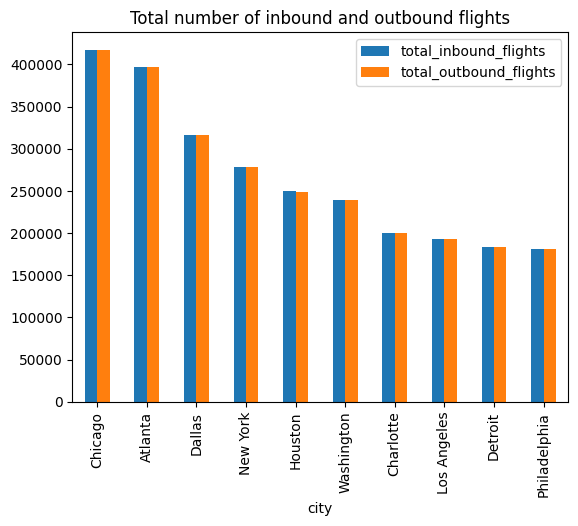

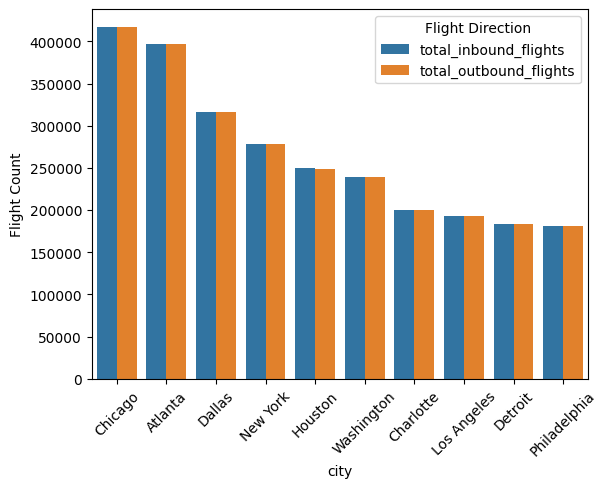

In [ ]:
#Q7:Plot group bar chart (see below image) with seaborn/matplotlib for the output in question 6 above, specifically city,total_inbound_flights,total_outbound_flights. One bar for total_inbound_flights and another for total_outbound_flights. Plot for only top 10 cities by total_inbound_flights.
#X-axis - city, Y-axis - total_outbound_flights, total_inbound_flights.
import matplotlib.pyplot as plt
import seaborn as sns
df_merge.plot(x="city", y=['total_inbound_flights', 'total_outbound_flights'], kind='bar')
plt.title('Total number of inbound and outbound flights')
plt.show()
#The seaborn barplot function does not natively support passing a DataFrame or multiple columns directly as the y parameter for plotting.
#Instead, the data needs to be in a long-form DataFrame where each row is a single observation.
#pd.melt: Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
df_long = pd.melt(df_merge, id_vars=['city'], value_vars=['total_inbound_flights', 'total_outbound_flights'],
                  var_name='Flight Direction', value_name='Flight Count')

# Now, plot using seaborn's barplot
sns.barplot(x='city', y='Flight Count', hue='Flight Direction', data=df_long)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Part 3
#Q1: Read the input csv file from here or here and convert columns to rows.
#The "Value" column values should come from the crop column names such as Maize Production (tonnes), Rice Production (tonnes) from the input csv file.
#(hint: UnPivot melt).
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df_food=pd.read_csv('/content/drive/MyDrive/world_food_production.csv')
melted_df = pd.melt(df_food, id_vars=['Entity', 'Year'], var_name='Productions', value_name='Value')
sorted_df = melted_df.sort_values(by=['Entity', 'Year'])
print(sorted_df.head(200))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             Entity  Year                    Productions      Value
0       Afghanistan  1961      Maize Production (tonnes)   700000.0
11912   Afghanistan  1961     Rice  Production ( tonnes)   319000.0
23824   Afghanistan  1961      Yams  Production (tonnes)  7467702.0
35736   Afghanistan  1961      Wheat Production (tonnes)  2279000.0
47648   Afghanistan  1961   Tomatoes Production (tonnes)  1873812.0
...             ...   ...                            ...        ...
226336  Afghanistan  1969  Bananas  Production ( tonnes)  3914729.0
238248  Afghanistan  1969   Avocados Production (tonnes)    76704.0
250160  Afghanistan  1969     Apples Production (tonnes)    28200.0
9       Afghanistan  1970      Maize Production (tonnes)   667000.0
11921   Afghanistan  1970     Rice  Production ( tonnes)   366000.0

[200 rows x 4 columns]


In [33]:
#Q2:For each unique value in column "Productions" from last column, you have to assign a unique integer/float value. The following is an example output with unique float value. (hint: use ordinal encoding)

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# To Fit and transform the 'Productions' column
melted_df['Productions'] = encoder.fit_transform(melted_df[['Productions']])

melted_df['Productions'] = melted_df['Productions'].astype(float)

print(melted_df)
melted_df.sort_values(by=['Entity', 'Year', 'Productions'], ascending=False)
print(melted_df.head(65))


             Entity  Year  Productions        Value
250152  Afghanistan  1961          0.0    15100.000
238240  Afghanistan  1961          1.0    63439.000
226328  Afghanistan  1961          2.0  3139079.000
202504  Afghanistan  1961          3.0   835368.000
190592  Afghanistan  1961          4.0   870970.000
...             ...   ...          ...          ...
83383      Zimbabwe  2021         17.0   262706.284
71471      Zimbabwe  2021         18.0   145563.000
59559      Zimbabwe  2021         19.0   206550.000
47647      Zimbabwe  2021         20.0  1316724.800
35735      Zimbabwe  2021         21.0  1153262.800

[262064 rows x 4 columns]
             Entity  Year  Productions      Value
250152  Afghanistan  1961          0.0    15100.0
238240  Afghanistan  1961          1.0    63439.0
226328  Afghanistan  1961          2.0  3139079.0
202504  Afghanistan  1961          3.0   835368.0
190592  Afghanistan  1961          4.0   870970.0
...             ...   ...          ...        ...

In [8]:
#Q3:Read "medical_data_synthetic.csv" and convert yes/no to 1/0 for non-numeric column ("obesity") without using custom function (lambda) for the medical dataset here. Column "gender" need to be converted to numeric too without custom function.
#(hint: use label encoding in sklearn library for "obesity" and use ordinal encoding for "gender")


#If we use LabelEncoder on a binary column, such as one with 'yes' and 'no' values, LabelEncoder will assign 0 to one class and 1 to the other.
#The order in which the numbers are assigned is alphabetical by default.
#Fit the Encoder: LabelEncoder first examines the data to determine how many unique labels are present. It encounters 'no' and 'yes', which are two distinct labels.
#Transform Labels to Integers: It then assigns an integer to each of the unique labels. By default, this is done in alphabetical order, so 'no' becomes 0 and 'yes' becomes 1.
#Inplace Transformation: When you assign the result back to the df['obesity'], the original text labels in the DataFrame are replaced by the encoded integers.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from google.colab import drive
drive.mount('/content/drive')
medical_df = pd.read_csv('/content/drive/MyDrive/medical_data_synthetic.csv')
#Applying LabelEncoder to the 'obesity' column
label_encoder = LabelEncoder()
medical_df['obesity'] = label_encoder.fit_transform(medical_df['obesity'])
#Applying OrdinalEncoder to the 'gender' column
#Specifying the order of categories to ensure 'female' is encoded as 0 and 'male' as 1
encoder = OrdinalEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['female', 'male']], dtype=int)
medical_df['gender'] = ordinal_encoder.fit_transform(medical_df[['gender']])
print(medical_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  patient_name   bp  sugar  obesity  gender
0          ram  111    110        1       1
1        radha  100    120        0       0
2        kumar  120    120        1       1
3         john  130     90        0       1
4         lily   92     91        1       0
